 ## Nlp iPhoneSE Reviwes: 
    
    - look at the data
    - cleaning 
    - visualize 
    - nlp cleaning 
    - spacy
    - sentment analysis
    - topic modeling
    - recommendation engine
    - clustering 

In [65]:
pip install Tokenizer

In [ ]:
 nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


________

In [3]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from wordcloud import WordCloud
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings

import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

import neattext.functions as nf

pd.set_option('display.max_colwidth', 10000)

In [3]:
df = pd.read_csv('APPLE_iPhone_SE.csv')
df.head()

,Ratings,Comment,Reviews
0,5,Super!,Great camera for pics and videos Battery life ...
1,5,Must buy!,Great device. Let me tell the Pros..1. Superb ...
2,5,Great product,"Who all loves older size i.e., 4.7 inch type s..."
3,5,Simply awesome,This iPhone SE is the best phone ever you get....
4,5,Classy product,This is my second iphone after iphone 4s. I’ve...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9713 entries, 0 to 9712
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Ratings  9713 non-null   int64 
 1   Comment  9713 non-null   object
 2   Reviews  9713 non-null   object
dtypes: int64(1), object(2)
memory usage: 227.8+ KB


In [5]:
len(df)

9713

In [6]:
df.shape

(9713, 3)

In [7]:
df.duplicated().sum()

649

In [8]:
df.drop_duplicates(inplace=True)
df

,Ratings,Comment,Reviews
0,5,Super!,Great camera for pics and videos Battery life ...
1,5,Must buy!,Great device. Let me tell the Pros..1. Superb ...
2,5,Great product,"Who all loves older size i.e., 4.7 inch type s..."
3,5,Simply awesome,This iPhone SE is the best phone ever you get....
4,5,Classy product,This is my second iphone after iphone 4s. I’ve...
...,...,...,...
9708,5,Terrific purchase,Absolutely brilliantREAD MORE
9709,5,Classy product,"Superb phone. This is my 4th iPhone, I feel SE..."
9710,5,Awesome,very niceREAD MORE
9711,5,Super!,Loving it as of now. Good Product .READ MORE


In [9]:
df.isna().sum()

Ratings    0
Comment    0
Reviews    0
dtype: int64

C:\Users\lamz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Ratings', ylabel='count'>

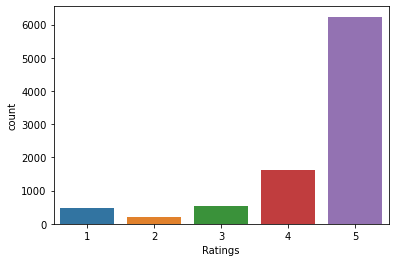

In [10]:
sns.countplot(df["Ratings"])

 - convert lower
 - english stop words 
 - panctuations

In [11]:
df['Reviews'].head(1)

0    Great camera for pics and videos Battery life ...
Name: Reviews, dtype: object

In [12]:
import re
import string


alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

df['Reviews'] = df.Reviews.map(alphanumeric).map(punc_lower)
df.head()


,Ratings,Comment,Reviews
0,5,Super!,great camera for pics and videos battery life ...
1,5,Must buy!,great device let me tell the pros superb ...
2,5,Great product,who all loves older size i e inch type s...
3,5,Simply awesome,this iphone se is the best phone ever you get ...
4,5,Classy product,this is my second iphone after iphone i’ve ...


In [15]:
df['Reviews'] = df['Reviews'].apply(nf.clean_text)

In [16]:
df.sample(20)

,Ratings,Comment,Reviews
4254,4,Delightful,gudread
5248,5,Terrific,best value phone price bracket non inclusion n...
6119,5,Terrific purchase,apple phone iphone share best experience mobil...
4327,4,Really Nice,handy phone nice performance satisfied battery...
6174,5,Terrific purchase,beautifully crafted masterpiece worth penny sp...
1988,5,Excellent,perfect phone small easy use read
6205,4,Very Good,iphone new hardware read
7109,5,Worth every penny,iphone needs review comparison apple addicted ...
1585,5,Highly recommended,great product apple read
4764,4,Very Good,got model flipcart dussehra sale bought price ...


In [17]:
df.Reviews[0]

'great camera pics videos battery life good far setting turn use use turn use power saving mode time day light gaming camera listening music car youtube bluetooth couple hours gives day battery varing hours sot dayperformance notch plays game task easevery premium phone look read'

In [18]:
# pd.set_option("max_columns", None)
pd.set_option('max_colwidth', None)
df['Reviews'].head(1)

0    great camera pics videos battery life good far setting turn use use turn use power saving mode time day light gaming camera listening music car youtube bluetooth couple hours gives day battery varing hours sot dayperformance notch plays game task easevery premium phone look read
Name: Reviews, dtype: object

In [19]:
import neattext.functions as nf

In [20]:
df['Reviews'] = df['Reviews'].apply(nf.remove_puncts)
df['Reviews'] = df['Reviews'].apply(nf.remove_numbers)
df['Reviews'] = df['Reviews'].apply(nf.remove_multiple_spaces)
df['Reviews'] = df['Reviews'].apply(nf.remove_special_characters)
df['Reviews'] = df['Reviews'].apply(nf.remove_stopwords)

lower = lambda x : x.lower()
df['Reviews'].map(lower)

0                                      great camera pics videos battery life good far setting turn use use turn use power saving mode time day light gaming camera listening music car youtube bluetooth couple hours gives day battery varing hours sot dayperformance notch plays game task easevery premium phone look read
1                                                                                                                great device let tell pros superb build quality great display camera great good lighting conditions processing great sound superb quality great red colour looks superb portrait mode photography superb read
2                                                                                                                                                                                                                                                   loves older size e inch type definitely better xr xs best price usage read
3                iphone se best phone beaut

In [21]:
df['Reviews'].head(1)

0    great camera pics videos battery life good far setting turn use use turn use power saving mode time day light gaming camera listening music car youtube bluetooth couple hours gives day battery varing hours sot dayperformance notch plays game task easevery premium phone look read
Name: Reviews, dtype: object

In [43]:
def add_reviews(x):
        if x['Ratings'] >= 3 : 
            text = 'Positive'

        elif x['Ratings'] < 3 : 
            text = 'Negative'
        return text

df['sentiment'] = df.apply(add_reviews,axis=1)

In [44]:
df.head(10)

,Ratings,Comment,Reviews,MyReviews,sentiment
0,5,Super!,great camera pics videos battery life good far setting turn use use turn use power saving mode time day light gaming camera listening music car youtube bluetooth couple hours gives day battery varing hours sot dayperformance notch plays game task easevery premium phone look read,Positive,Positive
1,5,Must buy!,great device let tell pros superb build quality great display camera great good lighting conditions processing great sound superb quality great red colour looks superb portrait mode photography superb read,Positive,Positive
2,5,Great product,loves older size e inch type definitely better xr xs best price usage read,Positive,Positive
3,5,Simply awesome,iphone se best phone beautifully designed gives classy look palms performance wise benchmark disappointed budget purchase point size looking wont disappointed strongly recommend phone people work oriented game loves skip phone game phone best features stunning looks performance battery life good read,Positive,Positive
4,5,Classy product,second iphone iphone ive long time android user ill tell phone prospective buyers photo video enthusiasts reliable camera fast excellent picture quality videos absolutely stable professional quality amazed people shoot youtube videos iphone downside display doesnt justice photos videos taken night photos read,Positive,Positive
5,4,Love at First Home Touch,totally worth price ios fan like compact phone want switch android iphone like clicking good photos camera unbeatable multitask normal phones stuck apps going hiatus lag like listen music speakers watch movie music feels like dolby atmos lot technical advantages dont want yo read,Positive,Positive
6,4,Wonderful,mobile handy packed good performances nice camera iphone good experience apple battery worst hardly getting hours screen time positive thing came know hours spending mobile poor battery mobile hours day read,Positive,Positive
7,4,Worth the money,compact handy good image stability gives amazing experience battery capacity little poor worth buying budget ratingread,Positive,Positive
8,4,Very Good,going use apple time amazed performance wise phone ultra camera pretty good attached images taken indoor display good best thing phone size easy use phone singe handedly excellent grip fits crisply pockets worst thing battery doesnt long better power bank avoid sudden switch read,Positive,Positive
9,3,Iphone SE Budgeted Phone of 2020?,purchased new iphone se based usage week rate product follows pros display quality good camera quality excellent takes sharp images blurriness touch sensor works precisely durability phone good quality body aluminum durable aluminum mobile industry read,Positive,Positive


In [24]:
df.Comment.unique()

array(['Super!', 'Must buy!', 'Great product', 'Simply awesome',
       'Classy product', 'Love at First Home Touch', 'Wonderful',
       'Worth the money', 'Very Good',
       'Iphone SE Budgeted Phone of 2020?', 'Brilliant',
       'Value-for-money', 'Nice product', 'Best in the market!',
       'Just wow!', 'Unsatisfactory', 'Perfect product!',
       'Best in this budget', 'Terrific', 'Awesome', 'Does the job',
       'Go for it without any hesitation.', 'Mind-blowing purchase',
       'Good phone for the price', 'Highly recommended', 'Good choice',
       'Worth every penny', 'Terrible product', 'Terrific purchase',
       'Super!Little Champ is here!', 'Perfecto !', 'Really Nice',
       'Excellent', 'Delightful', 'Nice', 'Fabulous!', 'Fair',
       'Excellent Phone', 'Good quality product', 'Does its job',
       'The first affordable iPhone',
       "Doesn't feel like carrying a BRICK!!", 'Pretty good',
       'Best upgrade for previous SE users - performance and battery',
    

In [38]:
# Generate a word cloud image
#wordcloud = WordCloud(background_color="white").generate(Reviews)
# Display the generated image:
# the matplotlib way:
#plt.figure(figsize=(10,10))
#plt.imshow(wordcloud, interpolation='bilinear')
#plt.axis("off")
#plt.show()

In [ ]:
word_freq_plot(df, 'Comment', apply_stopwords=True)

C:\Users\lamz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


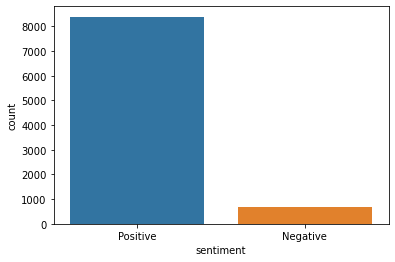

In [46]:
sns.countplot(df["sentiment"]);